In [108]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [110]:
# Loading the Financial Dataset
fin_data = pd.read_csv("compustat_2000_clean.csv", na_values = ["NA", "na", "?"], low_memory = False)

In [112]:
fin_data = fin_data.dropna(axis=1)
fin_data.shape

(235996, 301)

In [114]:
# Define the selected 10 variables
selected_columns = ["at", "ni", "revt", "ceq", "epspx", "capx", "oibdp", "wcap", "dltt", "xsga"]

# Slice the DataFrame to include only these columns
fin_data_selected = fin_data[selected_columns]

# Display the first few rows
print(fin_data_selected.head())

        at      ni     revt      ceq  epspx    capx   oibdp     wcap     dltt  \
0  701.854  18.531  874.255  340.212   0.69  13.134  64.367  360.464  179.987   
1  710.199 -58.939  638.721  310.235  -2.08  12.112  27.207  286.192  217.699   
2  686.621 -12.410  606.337  294.988  -0.39   9.930  30.745  192.837  164.658   
3  709.292   3.504  651.958  301.684   0.11  10.286  47.491  300.943  248.666   
4  732.230  15.453  747.848  314.744   0.58  13.033  61.774  314.517  227.159   

     xsga  
0  96.077  
1  85.037  
2  78.845  
3  81.165  
4  87.902  


In [116]:
X = fin_data_selected  # Feature matrix
y = fin_data["ggroup"]  # Target vector
feature_names = fin_data_selected.columns
gics_mapping = {
    2010.0: "Capital Goods",
    2030.0: "Transportation",
    4520.0: "Technology Hardware & Equipment",
    2020.0: "Commercial & Professional Services",
    3510.0: "Health Care Equipment & Services",
    3520.0: "Pharmaceuticals, Biotechnology & Life Sciences",
    2540.0: "Media & Entertainment",
    1010.0: "Energy",
    4020.0: "Diversified Financials",
    5510.0: "Utilities",
    5020.0: "Media",
    4030.0: "Insurance",
    2550.0: "Retailing",
    2520.0: "Consumer Durables & Apparel",
    4510.0: "Software & Services",
    4530.0: "Semiconductors & Semiconductor Equipment",
    5010.0: "Telecommunication Services",
    1510.0: "Materials",
    3030.0: "Household & Personal Products",
    3010.0: "Food & Staples Retailing",
    6010.0: "Equity Real Estate Investment Trusts (REITs)",
    3020.0: "Food, Beverage & Tobacco",
    2510.0: "Automobiles & Components",
    2530.0: "Consumer Services",
    6020.0: "Real Estate Management & Development",
    4010.0: "Banks",
    4040.0: "Real Estate"
}

In [118]:
# Convert to a pandas DataFrame for easier handling
knn_data = pd.DataFrame(X, columns=["at", "ni", "revt", "ceq", "epspx", "capx", "oibdp", "wcap", "dltt", "xsga"])
knn_data['Industry'] = y
knn_data['Industry'] = knn_data['Industry'].map(gics_mapping)

target_names = knn_data['Industry'].unique()

In [120]:
print("First five rows of the dataset:")
print(knn_data.head())

First five rows of the dataset:
        at      ni     revt      ceq  epspx    capx   oibdp     wcap     dltt  \
0  701.854  18.531  874.255  340.212   0.69  13.134  64.367  360.464  179.987   
1  710.199 -58.939  638.721  310.235  -2.08  12.112  27.207  286.192  217.699   
2  686.621 -12.410  606.337  294.988  -0.39   9.930  30.745  192.837  164.658   
3  709.292   3.504  651.958  301.684   0.11  10.286  47.491  300.943  248.666   
4  732.230  15.453  747.848  314.744   0.58  13.033  61.774  314.517  227.159   

     xsga       Industry  
0  96.077  Capital Goods  
1  85.037  Capital Goods  
2  78.845  Capital Goods  
3  81.165  Capital Goods  
4  87.902  Capital Goods  


In [122]:
# Standardize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [124]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

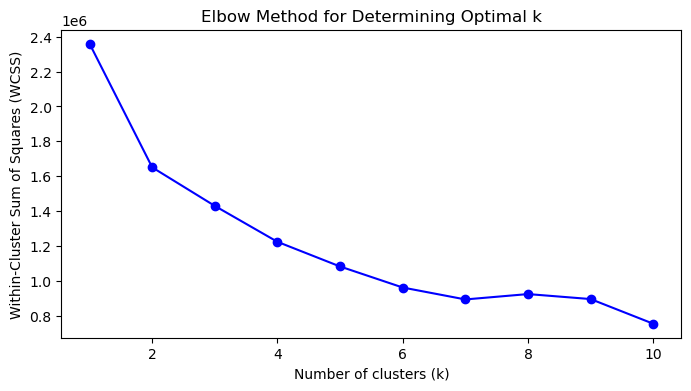

In [126]:
# Plot the Elbow Method graph
plt.figure(figsize=(8,4))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal k')
plt.show()

In [128]:
# From the Elbow plot, choose k=6
k_optimal = 6

# Initialize K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=k_optimal, random_state=42)

# Fit K-Means to the scaled data
kmeans.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [130]:
# Predict cluster assignments
clusters = kmeans.predict(X_scaled)

In [68]:
# Evaluate clustering performance using Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for k={k_optimal}: {silhouette_avg:.2f}")

KeyboardInterrupt: 

In [138]:
# Compare the clusters with true labels using a confusion matrix
# Note: Cluster labels may not match true labels; this is for demonstration
print("\nConfusion Matrix between True Labels and Clusters:")
cm = confusion_matrix(y, clusters)
print(cm)


Confusion Matrix between True Labels and Clusters:
[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [6453    0    0 ...    0    0    0]
 [4456    0    0 ...    0    0    0]
 [1287    0    0 ...    0    0    0]]


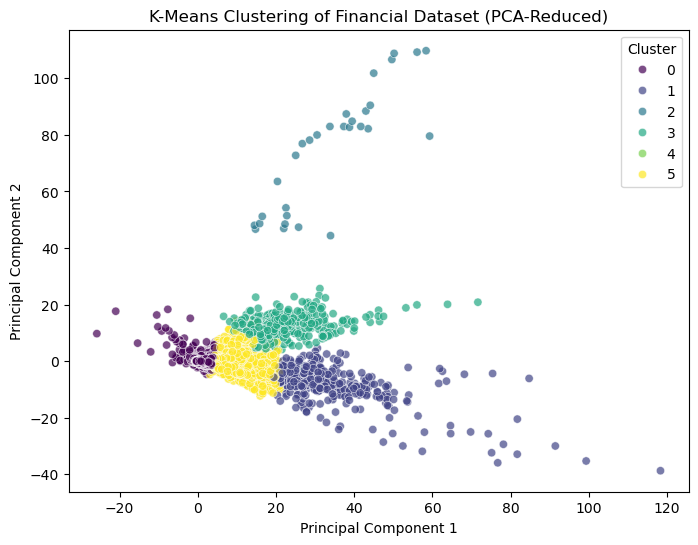

In [140]:
# Visualize the clusters using the first two principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=clusters,
    palette='viridis',
    markers=['o', 's', 'D'],
    alpha=0.7
)
plt.title('K-Means Clustering of Financial Dataset (PCA-Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()